In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
%pwd

In [3]:
path = %pwd

In [7]:
play_store_app = pd.read_csv(path + "/google_play_store/googleplaystore.csv")

In [ ]:
#app_user_review = pd.read_csv(path + "googleplaystore_user_reviews.csv")

# Data Exploration

In [8]:
play_store_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
play_store_app.shape

(10841, 13)

10841 possible row entries and 13 coulumns

In [10]:
play_store_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Only ratings is indicated as float, Reviews, Size, Number of installs need to be in numeric terms

In [11]:
play_store_app['Reviews'] = pd.to_numeric(play_store_app.Reviews, errors = 'coerce')

In [12]:
play_store_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10840 non-null float64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [13]:
play_store_app.App.value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Duolingo: Learn Languages Free                        7
ESPN                                                  7
Candy Crush Saga                                      7
8 Ball Pool                                           7
Temple Run 2                                          6
Nick                                                  6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Bowmasters                                            6
Helix Jump                                            6
slither.io                                            6
Subway Surfers                                        6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Granny                                                5
Wish - Shopping Made Fun                        

This shows that there are app duplicates in the dataset.

In [14]:
play_store_app[play_store_app['App'].isin(['ROBLOX', 'Candy Crush Saga','Granny'])].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1842,Candy Crush Saga,GAME,4.4,22429716.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1679,Granny,GAME,4.5,1135631.0,59M,"50,000,000+",Free,0,Teen,Arcade,"May 29, 2018",1.4.0.1,4.0 and up
1724,Granny,GAME,4.5,1137271.0,59M,"50,000,000+",Free,0,Teen,Arcade,"May 29, 2018",1.4.0.1,4.0 and up
1754,Granny,GAME,4.5,1137267.0,59M,"50,000,000+",Free,0,Teen,Arcade,"May 29, 2018",1.4.0.1,4.0 and up


Inspecting some of the duplicate values indicate that they have the same data with minor changes in their number of reviews during crawling.

I therefore drop duplicates of each App <b>keeping the one with the highest review at the time</b>

In [15]:
play_store_app_sorted = play_store_app.sort_values(by = ['App', 'Reviews'], ascending = True)

In [16]:
#drops other duplicates keeping the App with the highest reviews
play_store_app_sorted.drop_duplicates('App',keep='last',inplace=True)

In [17]:
play_store_app_sorted[play_store_app_sorted['App'].isin(['ROBLOX', 'Candy Crush Saga','Granny'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1966,Candy Crush Saga,GAME,4.4,22430188.0,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1901,Granny,GAME,4.5,1138239.0,59M,"50,000,000+",Free,0,Teen,Arcade,"May 29, 2018",1.4.0.1,4.0 and up
2206,ROBLOX,FAMILY,4.5,4450890.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [18]:
play_store_app_sorted.App.value_counts().head(10)

YouTube TV - Watch & Record Live TV                   1
Fr. Mike Schmitz Audio Teachings                      1
Goldstar: Live Event Tickets                          1
Galaxy Gift                                           1
PowerDirector Video Editor App: 4K, Slow Mo & More    1
S Player - Lightest and Most Powerful Video Player    1
Fahrschule DW                                         1
Avenger Legends                                       1
DH Mariage                                            1
AT&T Messages for Tablet                              1
Name: App, dtype: int64

In [19]:
play_store_app_sorted.shape

(9660, 13)

In [20]:
play_store_app_sorted.Category.value_counts()

FAMILY                 1878
GAME                    945
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [21]:
# Drop the category named 1.9, unknown category
#play_store_app_sorted.drop(play_store_app_sorted['Category'] == '1.9')
play_store_app_sorted[play_store_app_sorted['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
play_store_app_sorted = play_store_app_sorted.drop([10472])

In [23]:
play_store_app_sorted.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27.0,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259.0,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [24]:
play_store_app_sorted.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [25]:
play_store_app_sorted[play_store_app_sorted['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [26]:
play_store_app_sorted.fillna({'Type': 'Free'}, inplace=True)

## To convert size to numeric column with actual values

In [27]:
play_store_app_sorted.Size.value_counts().sort_values()

940k                     1
475k                     1
801k                     1
39k                      1
143k                     1
478k                     1
545k                     1
881k                     1
809k                     1
67k                      1
73k                      1
175k                     1
144k                     1
191k                     1
930k                     1
81k                      1
658k                     1
981k                     1
551k                     1
523k                     1
642k                     1
239k                     1
103k                     1
350k                     1
20k                      1
421k                     1
429k                     1
241k                     1
779k                     1
902k                     1
                      ... 
2.8M                    65
2.9M                    67
37M                     67
31M                     67
2.3M                    68
2.5M                    68
3

The column currently contail alphanumeric values. I call a function to work on the strings and convert to numbers

In [28]:
play_store_app_sorted.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [29]:
#Convert non numeric values in App size to NAN
play_store_app_sorted['Size'][play_store_app_sorted['Size'] == 'Varies with device'] = np.nan

/home/lao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
#Replace M with 1 million and k with 1 thousand
play_store_app_sorted['Size'] = play_store_app_sorted.Size.str.replace('M', 'e6')
play_store_app_sorted['Size'] = play_store_app_sorted.Size.str.replace('k', 'e3')

In [31]:
#play_store_app_sorted['Size']
#convert column to numeric, dropping non numeric values
play_store_app_sorted['Size'] = pd.to_numeric(play_store_app_sorted['Size'], errors = 'coerce')

In [32]:
play_store_app_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 8884 to 882
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null float64
Size              8431 non-null float64
Installs          9659 non-null object
Type              9659 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


Now, Size has been converted to numeric value.

Next is to convert number of instals to numeric and apply binning to show and digitize the range of values.

In [33]:
play_store_app_sorted['Installs'].value_counts()

1,000,000+        1417
100,000+          1113
10,000+           1030
10,000,000+        937
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [34]:
# To eliminate the '+' and ',' signs and convert to numeric
play_store_app_sorted['Installs'] = play_store_app_sorted.Installs.str.replace('+', '')
play_store_app_sorted['Installs'] = play_store_app_sorted.Installs.str.replace(',', '')
play_store_app_sorted['Installs'] = pd.to_numeric(play_store_app_sorted['Installs'], errors = 'coerce')

In [35]:
play_store_app_sorted['Installs'].value_counts()

1000000       1417
100000        1113
10000         1030
10000000       937
1000           887
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [36]:
play_store_app_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 8884 to 882
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null float64
Size              8431 non-null float64
Installs          9659 non-null int64
Type              9659 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


### To create bins

In [37]:
bin_array = play_store_app_sorted.Installs.sort_values().unique()

In [38]:
bins = [x for x in bin_array]

# Added 5 billion for the higher range
bins.append(5000000000)

In [39]:
#Create bins for Installs
play_store_app_sorted['Installs_binned'] = pd.cut(play_store_app_sorted['Installs'], bins)

In [40]:
# Digitize the bins for encoding
Installs_digitized = np.digitize(play_store_app_sorted['Installs'], bins = bins )

#Add to the data frame as a column
play_store_app_sorted = play_store_app_sorted.assign(Installs_d = pd.Series(Installs_digitized).values)

In [41]:
play_store_app_sorted['Installs_binned']

8884               (100, 500]
8532        (500000, 1000000]
324             (5000, 10000]
4541            (5000, 10000]
4636            (5000, 10000]
5940                (50, 100]
10252         (50000, 100000]
1407         (100000, 500000]
8483          (50000, 100000]
7738                (50, 100]
8219               (100, 500]
9401      (5000000, 10000000]
4030             (1000, 5000]
8703            (5000, 10000]
4026           (10000, 50000]
220         (500000, 1000000]
2694      (5000000, 10000000]
5344           (10000, 50000]
2483                   (1, 5]
6760              (500, 1000]
2543        (500000, 1000000]
1997      (5000000, 10000000]
7382               (100, 500]
7993                (50, 100]
7666              (500, 1000]
7338        (500000, 1000000]
7330        (500000, 1000000]
4959           (10000, 50000]
6518                (50, 100]
2385              (500, 1000]
                 ...         
8133            (5000, 10000]
7818          (50000, 100000]
7183      

In [42]:
play_store_app_sorted.describe()

,Rating,Reviews,Size,Installs,Installs_d
count,8196.000000,9.659000e+03,8.431000e+03,9.659000e+03,9659.000000
mean,4.173267,2.168041e+05,2.039847e+07,7.798170e+06,11.164820
std,0.536253,1.831430e+06,2.182860e+07,5.376973e+07,3.817644
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,1.000000
25%,4.000000,2.500000e+01,4.600000e+06,1.000000e+03,8.000000
50%,4.300000,9.690000e+02,1.200000e+07,1.000000e+05,12.000000
75%,4.500000,2.945350e+04,2.800000e+07,1.000000e+06,14.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,20.000000


### Modelling

Using ['Category', 'Reviews', 'Size' , 'Installs'] to predict 'Rating'

In [43]:
attributes = ['Category', 'Reviews', 'Size' , 'Installs_d','Rating']
psa = play_store_app_sorted[attributes].dropna().copy()

In [44]:
psa.info()
#from pandas.tools.plotting import scatter_matrix
#attributes = ['Category', 'Reviews', 'Size' , 'Installs','Rating']

#scatter_matrix(psa[attributes], figsize=(12, 8))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7026 entries, 8532 to 882
Data columns (total 5 columns):
Category      7026 non-null object
Reviews       7026 non-null float64
Size          7026 non-null float64
Installs_d    7026 non-null int64
Rating        7026 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 329.3+ KB


In [45]:
psa.corr()

,Reviews,Size,Installs_d,Rating
Reviews,1.000000,0.180484,0.250977,0.067707
Size,0.180484,1.000000,0.298295,0.062955
Installs_d,0.250977,0.298295,1.000000,0.060177
Rating,0.067707,0.062955,0.060177,1.000000


## Convert Ratings to two categories

- 3.5 - 5.0 High rating
- < 3.5 Low Rating

In [46]:
#function to convert ratings to high and low categories.
Rating_cat = dict()
for i in range(0,len(psa['Rating'])):
    if psa['Rating'].iloc[i] >= 3.5:
        Rating_cat[i] = 'High'
    else: Rating_cat[i] = 'Low'
#Add the categorical column to the data 
psa = psa.assign(Rating_cat = pd.Series(Rating_cat).values)

In [47]:
psa['Rating_cat'].value_counts()

High    6355
Low      671
Name: Rating_cat, dtype: int64

## Feature Engineering

In [48]:
#drop the Ratings column
psa = psa.drop(['Rating'], axis = 1)

#To encode the Ratings labels for learning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
psa['Rating_cat'] = le.fit_transform(psa['Rating_cat'])

In [49]:
#To view the encoded labels
list(le.classes_)

['High', 'Low']

In [50]:
#Applying One-Hot Encoding to the Categorical Column 'Category' and 'Installs_d'
psa_encode = pd.get_dummies(psa, columns= ['Category', 'Installs_d'])

In [51]:
psa_encode.columns

Index(['Reviews', 'Size', 'Rating_cat', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Installs_d_2',
       'Installs_d_3', 'Installs_d_4', 'Installs_d_5', 'Installs_

In [52]:
X = psa_encode.drop(['Rating_cat'], axis = 1)
y = psa_encode['Rating_cat']

In [53]:
y.value_counts()

0    6355
1     671
Name: Rating_cat, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

Oversampling of high ratings detected. Let's try to correct that.

In [56]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [59]:
X_train_res.shape

(10154, 54)

In [60]:
y_train_res.shape

(10154,)

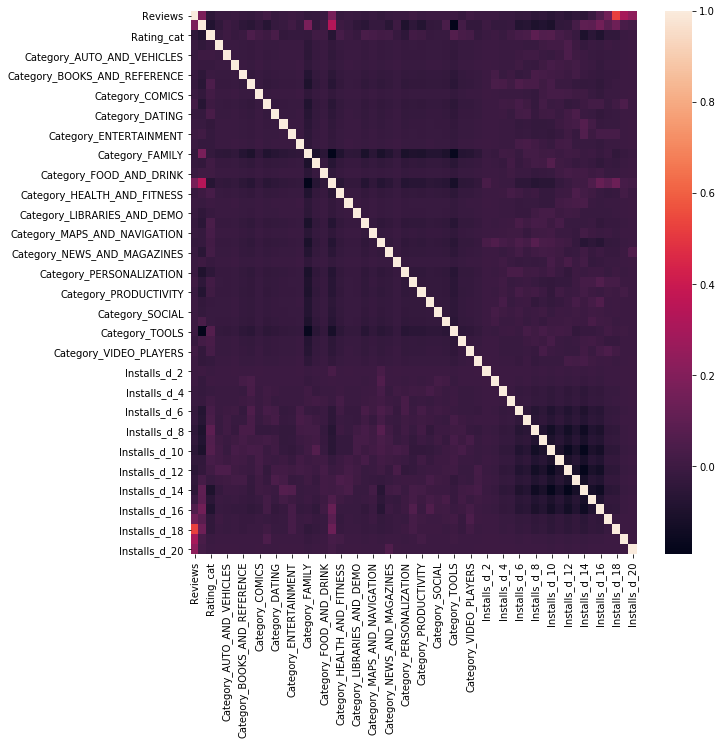

In [61]:
#Checking for correlation using heatmap
import seaborn as sns
plt.figure(figsize=(10,10)) 

sns.heatmap(psa_encode.corr())

### Applying cross validation to dataset

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(knn, X, y, cv = 3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.89073837 0.89923143 0.89619821]


In [63]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.90


In [64]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_res,y_train_res);
    print('For n = {}, Train Score = {},\t Test Score = {}'.format(i,knn.score(X_train_res,y_train_res),knn.score(X_test, y_test) )) 

For n = 1, Train Score = 0.9997045499310616,	 Test Score = 0.7432432432432432
For n = 2, Train Score = 0.9007287768367146,	 Test Score = 0.8129445234708392
For n = 3, Train Score = 0.8868426235966121,	 Test Score = 0.7382645803698435
For n = 4, Train Score = 0.8636990348631082,	 Test Score = 0.7788051209103841
For n = 5, Train Score = 0.8555249162891472,	 Test Score = 0.7268847795163584
For n = 6, Train Score = 0.8366161118770927,	 Test Score = 0.7596017069701281
For n = 7, Train Score = 0.8352373448887138,	 Test Score = 0.7183499288762447
For n = 8, Train Score = 0.8231238920622415,	 Test Score = 0.7489331436699858
For n = 9, Train Score = 0.8136694898562143,	 Test Score = 0.7048364153627311


In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, max_depth = 10,  random_state=2)


forest.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [66]:
scores = cross_val_score(forest, X, y, cv = 3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.90439607 0.90435525 0.90474156]


In [67]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_res,y_train_res)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.915
Accuracy on test set: 0.844


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(learning_rate=0.1, random_state=0)
gbrt.fit(X_train_res,y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [69]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train_res,y_train_res)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.938
Accuracy on test set: 0.905
